## Libraries import

In [2]:
import datetime

import pandas as pd
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


## Reading data

In [3]:
data =pd.read_csv('drive/My Drive/Colab Notebooks/data_wind/turbine_data.csv', parse_dates=["Unnamed: 0"]) #dont forget parse_dates

In [4]:
#data.head()
data.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,1029.834789,57.694813,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


---> its in 10 min timesteps, unnamed:0 is our datetime

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   Unnamed: 0                    118224 non-null  datetime64[ns, UTC]
 1   ActivePower                   94750 non-null   float64            
 2   AmbientTemperatue             93817 non-null   float64            
 3   BearingShaftTemperature       62518 non-null   float64            
 4   Blade1PitchAngle              41996 non-null   float64            
 5   Blade2PitchAngle              41891 non-null   float64            
 6   Blade3PitchAngle              41891 non-null   float64            
 7   ControlBoxTemperature         62160 non-null   float64            
 8   GearboxBearingTemperature     62540 non-null   float64            
 9   GearboxOilTemperature         62438 non-null   float64            
 10  GeneratorRPM        

In [6]:
print(data.nunique(axis=0))

Unnamed: 0                      118224
ActivePower                      94084
AmbientTemperatue                93678
BearingShaftTemperature          62286
Blade1PitchAngle                 38946
Blade2PitchAngle                 39021
Blade3PitchAngle                 39021
ControlBoxTemperature                1
GearboxBearingTemperature        62313
GearboxOilTemperature            62412
GeneratorRPM                     61074
GeneratorWinding1Temperature     62406
GeneratorWinding2Temperature     62424
HubTemperature                   38119
MainBoxTemperature               49145
NacellePosition                   6664
ReactivePower                    94040
RotorRPM                         59254
TurbineStatus                      353
WTG                                  1
WindDirection                     6664
WindSpeed                        94224
dtype: int64


In [7]:
df = data.copy(deep=True) #create a copy of our data in a new df to work with

In [8]:
df.drop(columns=['WTG', 'ControlBoxTemperature'], inplace=True) #drop these columns WTG and ControlboxTemperature only have 1 unique value. We drop it here

In [9]:
#df= df.rename(columns={'Unnamed: 0':'DateTime'})  #rename the datetime column to a better suited title
df['DateTime'] = df['Unnamed: 0'] 
df.drop('Unnamed: 0', axis=1, inplace=True)

#df['DateTime']=pd.to_datetime(df['Unnamed: 0'],format= '%Y-%m-%dT%H:%M:%SZ',errors='coerce')

In [10]:
df['DateTime'].head(20)

0    2017-12-31 00:00:00+00:00
1    2017-12-31 00:10:00+00:00
2    2017-12-31 00:20:00+00:00
3    2017-12-31 00:30:00+00:00
4    2017-12-31 00:40:00+00:00
5    2017-12-31 00:50:00+00:00
6    2017-12-31 01:00:00+00:00
7    2017-12-31 01:10:00+00:00
8    2017-12-31 01:20:00+00:00
9    2017-12-31 01:30:00+00:00
10   2017-12-31 01:40:00+00:00
11   2017-12-31 01:50:00+00:00
12   2017-12-31 02:00:00+00:00
13   2017-12-31 02:10:00+00:00
14   2017-12-31 02:20:00+00:00
15   2017-12-31 02:30:00+00:00
16   2017-12-31 02:40:00+00:00
17   2017-12-31 02:50:00+00:00
18   2017-12-31 03:00:00+00:00
19   2017-12-31 03:10:00+00:00
Name: DateTime, dtype: datetime64[ns, UTC]

In [11]:
# Add datetime parameters 
df['DateTime'] = pd.to_datetime(df['DateTime'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute

In [12]:
# Drop original DateTime column
df.drop('DateTime', axis=1, inplace= True)

In [13]:
df.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,year,month,day,hour,minute
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,0,10
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,0,20
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,0,30
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,0,40


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   GearboxBearingTemperature     62540 non-null   float64
 7   GearboxOilTemperature         62438 non-null   float64
 8   GeneratorRPM                  62295 non-null   float64
 9   GeneratorWinding1Temperature  62427 non-null   float64
 10  GeneratorWinding2Temperature  62449 non-null   float64
 11  HubTemperature                62406 non-null   float64
 12  MainBoxTemperature            62507 non-null

## Dealing with null/missing values

In [15]:
df.isna().sum() #sum up the missing values for each column

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
year                                0
month                               0
day                                 0
hour                                0
minute                              0
dtype: int64

In [16]:
# lets start by just filling missing values with the median

for label, content in df.items():                                               # df.items lets us iterate over column name, series --> returns a tuple with column name and the content as a series
    if pd.api.types.is_numeric_dtype(content):                                  # Check whether the provided array or dtype is of a numeric dtype.
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())


In [17]:
df.head(1)

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed,year,month,day,hour,minute,ActivePower_is_missing,AmbientTemperatue_is_missing,BearingShaftTemperature_is_missing,Blade1PitchAngle_is_missing,Blade2PitchAngle_is_missing,Blade3PitchAngle_is_missing,GearboxBearingTemperature_is_missing,GearboxOilTemperature_is_missing,GeneratorRPM_is_missing,GeneratorWinding1Temperature_is_missing,GeneratorWinding2Temperature_is_missing,HubTemperature_is_missing,MainBoxTemperature_is_missing,NacellePosition_is_missing,ReactivePower_is_missing,RotorRPM_is_missing,TurbineStatus_is_missing,WindDirection_is_missing,WindSpeed_is_missing
0,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,64.834662,57.196089,1124.86072,65.7888,65.004946,37.003815,39.49131,182.0,35.883659,10.098702,2.0,182.0,5.557765,2017,12,31,0,0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [18]:
df.isna().sum()

ActivePower                                0
AmbientTemperatue                          0
BearingShaftTemperature                    0
Blade1PitchAngle                           0
Blade2PitchAngle                           0
Blade3PitchAngle                           0
GearboxBearingTemperature                  0
GearboxOilTemperature                      0
GeneratorRPM                               0
GeneratorWinding1Temperature               0
GeneratorWinding2Temperature               0
HubTemperature                             0
MainBoxTemperature                         0
NacellePosition                            0
ReactivePower                              0
RotorRPM                                   0
TurbineStatus                              0
WindDirection                              0
WindSpeed                                  0
year                                       0
month                                      0
day                                        0
hour      

In [19]:
#### Testing for Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['ActivePower'])
#H0 it is non stationary
#H1 it is stationary


def adfuller_test(Power):
  result=adfuller(Power)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
      print(label+' : '+str(value) )
  if result[1] <= 0.05:
      print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
      print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(df['ActivePower'])

ADF Test Statistic : -21.001664058258637
p-value : 0.0
#Lags Used : 71
Number of Observations Used : 118152
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Exploration

In [20]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

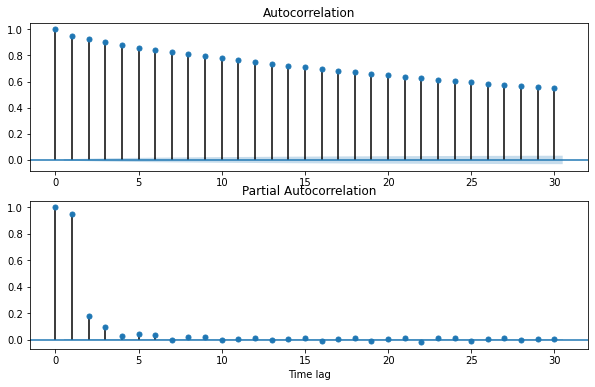

In [21]:
#Analysis of ACF and PACF 
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['ActivePower'], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['ActivePower'], lags=30, ax=ax2)
plt.xlabel('Time lag')
plt.show()

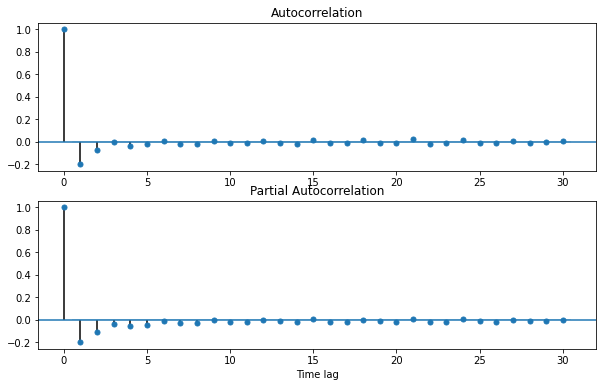

In [22]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['ActivePower'].diff().dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['ActivePower'].diff().dropna(), lags=30, ax=ax2)
plt.xlabel('Time lag')
plt.show()

In [23]:
#just to show the moving average of the activepower
activepower = df['ActivePower'][:3000]
p_average=activepower.rolling(window=7).mean()

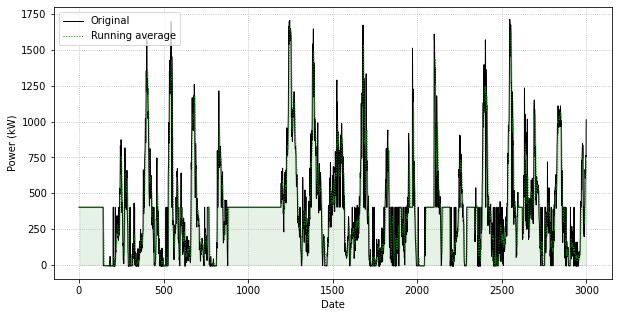

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(activepower, 'k-', label='Original',linewidth=1)
plt.plot(p_average, 'g:', label='Running average', linewidth=1)
plt.ylabel('Power (kW)') #check if it is really kW!!!!!!!!!!!!
plt.xlabel('Date')
plt.grid(linestyle=':')
plt.fill_between(p_average.index, 0, p_average, color='g', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

## Modelling

In [37]:
# try ARIMA -> Auto-Regressive Integrated Moving Average
#ARMA better choice because the time series is stationary?
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['ActivePower'][:6000], order=(3,0,3))   #order = (p,d,q) -> use cut-off point of PACF as p cut-off point of ACF as q /// A good way to think about it is (AR, I, MA) @stackexchange https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


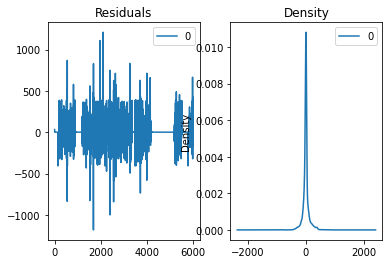

In [38]:
#plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde',title='Density', ax=ax[1])
plt.show()

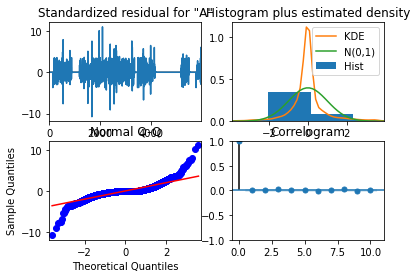

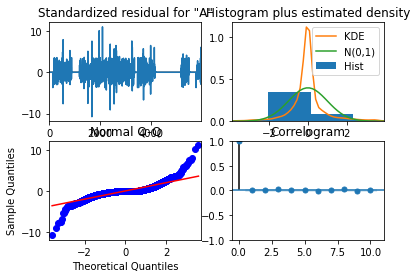

In [39]:
#Actual vs Fitted
model_fit.plot_diagnostics()

In [40]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            ActivePower   No. Observations:                 6000
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -36696.169
Date:                Tue, 11 Oct 2022   AIC                          73408.338
Time:                        12:40:25   BIC                          73461.934
Sample:                             0   HQIC                         73426.950
                               - 6000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        369.0237     34.496     10.697      0.000     301.412     436.635
ar.L1          0.0132      0.014      0.921      0.357      -0.015       0.041
ar.L2         -0.0240      0.015     -1.591      0.1